# Project: Life Expectancy and GDP

As part of my research project, I will be delving into analyzing data on GDP and life expectancy across six countries. This will be an exciting opportunity to gain a deeper understanding of the complex interplay between economic development and health outcomes.


During this project, we will analyze, prepare, and plot data in order to answer questions in a meaningful way.

**Goals**

1.Consider the overall indicators.

2.Determine the life expectancy of various countries.

3.Identify the GDP growth rates of various countries.

4.Investigate if there is a correlation between life expectancy and GDP.

5.Draw a conclusion based on the findings of the analysis.

## Importing data and viewing overall statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.stats as pearsonr
import statsmodels.api as sm

In [2]:
gdp_data = pd.read_csv('all_data.csv')
gdp_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
gdp_data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [5]:
gdp_data.Year.nunique()

16

In [6]:
gdp_data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [7]:
gdp_data.Country.nunique()

6

In [8]:
gdp_data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [9]:
table = pd.pivot_table(gdp_data, values='GDP', index=['Year'],
                    columns=['Country'])
print(table)

Country         Chile         China       Germany        Mexico  \
Year                                                              
2000     7.786093e+10  1.211350e+12  1.949950e+12  6.836480e+11   
2001     7.097992e+10  1.339400e+12  1.950650e+12  7.247040e+11   
2002     6.973681e+10  1.470550e+12  2.079140e+12  7.415600e+11   
2003     7.564346e+10  1.660290e+12  2.505730e+12  7.132840e+11   
2004     9.921039e+10  1.955350e+12  2.819250e+12  7.702680e+11   
2005     1.229650e+11  2.285970e+12  2.861410e+12  8.663460e+11   
2006     1.547880e+11  2.752130e+12  3.002450e+12  9.652810e+11   
2007     1.736060e+11  3.552180e+12  3.439950e+12  1.043470e+12   
2008     1.796380e+11  4.598210e+12  3.752370e+12  1.101280e+12   
2009     1.723890e+11  5.109950e+12  3.418010e+12  8.949490e+11   
2010     2.185380e+11  6.100620e+12  3.417090e+12  1.051130e+12   
2011     2.522520e+11  7.572550e+12  3.757700e+12  1.171190e+12   
2012     2.671220e+11  8.560550e+12  3.543980e+12  1.186600e+1

In [10]:
table = pd.pivot_table(gdp_data, values='Life expectancy at birth (years)', index=['Year'],
                    columns=['Country'])
print(table)

Country  Chile  China  Germany  Mexico  United States of America  Zimbabwe
Year                                                                      
2000      77.3   71.7     78.0    74.8                      76.8      46.0
2001      77.3   72.2     78.3    75.0                      76.9      45.3
2002      77.8   72.7     78.4    75.0                      77.0      44.8
2003      77.9   73.1     78.5    75.0                      77.2      44.5
2004      78.0   73.5     79.1    75.4                      77.5      44.3
2005      78.4   73.9     79.2    75.3                      77.5      44.6
2006      78.9   74.2     79.6    75.8                      77.8      45.4
2007      78.9   74.4     79.8    76.0                      78.1      46.6
2008      79.6   74.5     79.9    75.6                      78.2      48.2
2009      79.3   74.9     80.0    75.7                      78.5      50.0
2010      79.1   75.0     80.1    75.6                      78.7      52.4
2011      79.8   75.2    

Over time, all indicators become more positive, reflecting a trend of ongoing improvement and progress. This positive shift is a testament to the resilience and adaptability of society as it navigates the challenges and opportunities of each passing year.

In [11]:
groupby_country = gdp_data.groupby(['Country']).mean()
groupby_country.reset_index('Country', inplace=True)
groupby_country[['Country', 'Life expectancy at birth (years)', 'GDP']]

,Country,Life expectancy at birth (years),GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Zimbabwe has the unfortunate distinction of having the lowest life expectancy in the world. Meanwhile, Mexico and China have life expectancies that hover around 75 years, while the United States, Chile, and Germany enjoy some of the highest life expectancies globally.

In [12]:
groupby_year = gdp_data.groupby(['Year']).mean(['GDP'], ['Life expectancy at birth (years)'])
groupby_year.reset_index('Year', inplace=True)
groupby_year[['Year', 'Life expectancy at birth (years)', 'GDP']]

,Year,Life expectancy at birth (years),GDP
0,2000,70.766667,2.371583e+12
1,2001,70.833333,2.448752e+12
2,2002,70.950000,2.561221e+12
3,2003,71.033333,2.743446e+12
4,2004,71.300000,2.991647e+12
5,2005,71.483333,3.207074e+12
6,2006,71.950000,3.463349e+12
7,2007,72.300000,3.785750e+12
8,2008,72.666667,4.055986e+12
9,2009,73.066667,4.000653e+12


Year after year, the GDP shows a steady growth, indicating a positive trend in the country's economic development.

## Let's start visualizing the data for detailed analysis

### One variable

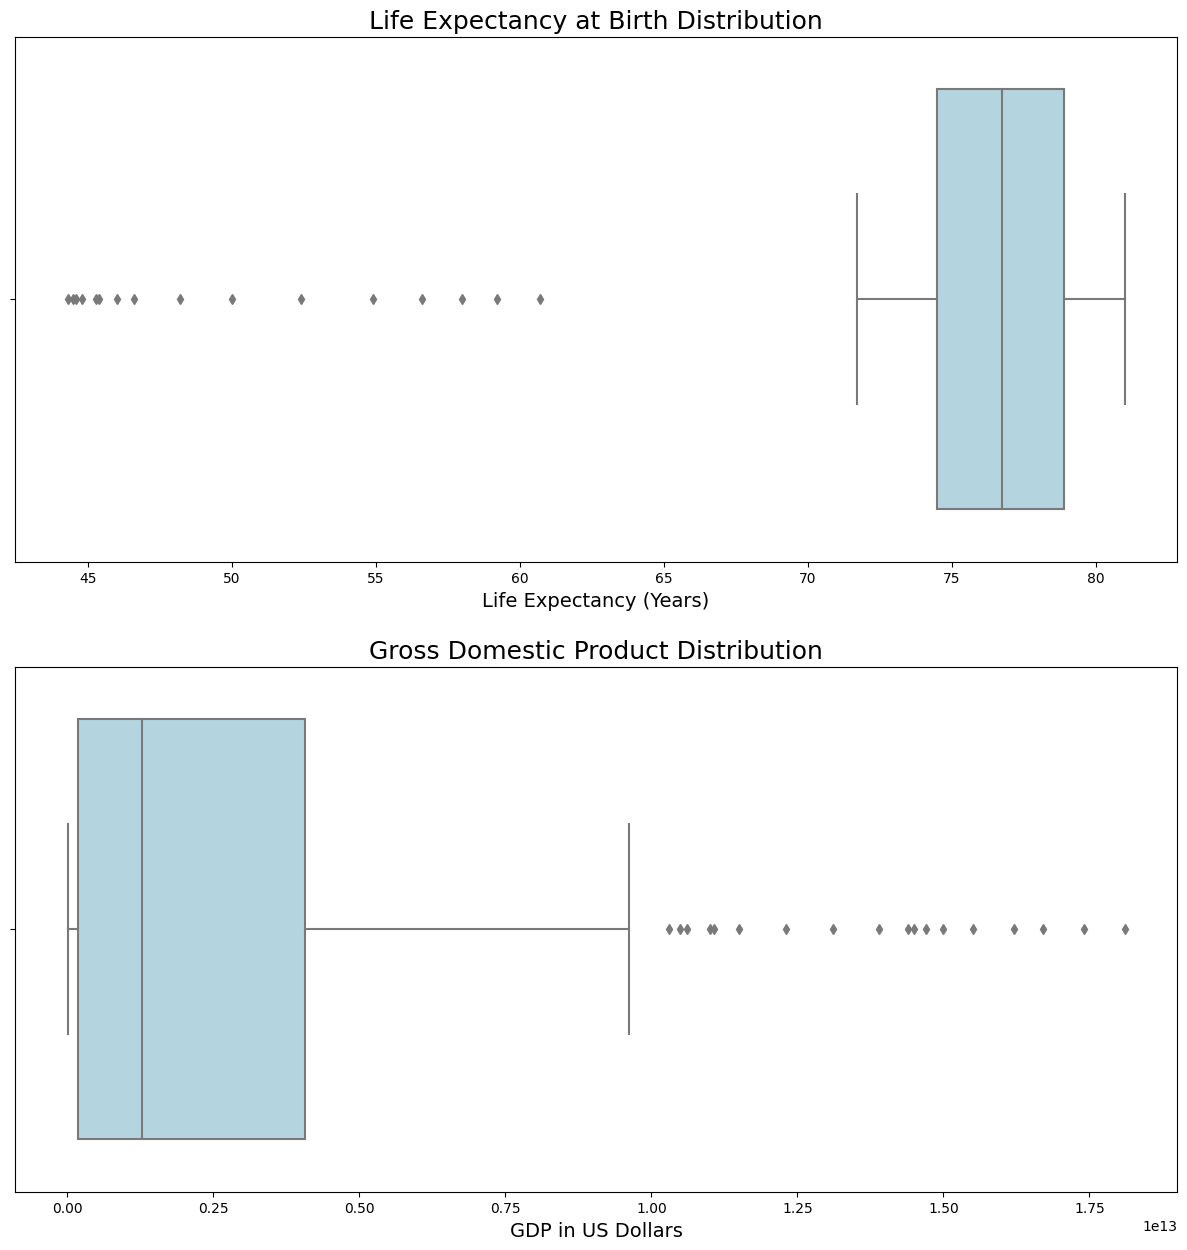

In [13]:
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
sns.boxplot(x=gdp_data['Life expectancy at birth (years)'], color='lightblue')
plt.xlabel('Life Expectancy (Years)', size=14)
plt.title('Life Expectancy at Birth Distribution', loc='center', size=18)

plt.subplot(2,1,2)
sns.boxplot(x=gdp_data['GDP'], color='lightblue')
plt.xlabel('GDP in US Dollars', size=14)
plt.title('Gross Domestic Product Distribution', loc='center', size=18)

plt.show()

According to the plots, there is a single outlier for life expectancy (Zimbabwe), and another outlier for GDP (USA).

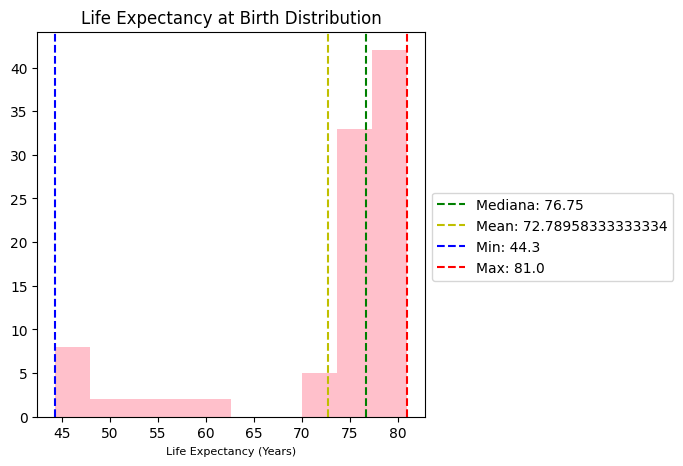

In [14]:
plt.figure(figsize=(5, 5))
plt.hist(x=gdp_data['Life expectancy at birth (years)'], color='pink')
plt.axvline(x=gdp_data['Life expectancy at birth (years)'].median(), color='g', label='Mediana: ' + str(gdp_data['Life expectancy at birth (years)'].median()), linestyle='--')
plt.axvline(x=gdp_data['Life expectancy at birth (years)'].mean(), color='y', label='Mean: ' + str(gdp_data['Life expectancy at birth (years)'].mean()), linestyle='--')
plt.axvline(x=gdp_data['Life expectancy at birth (years)'].min(), color='b', label='Min: ' + str(gdp_data['Life expectancy at birth (years)'].min()), linestyle='--')
plt.axvline(x=gdp_data['Life expectancy at birth (years)'].max(), color='r', label='Max: ' + str(gdp_data['Life expectancy at birth (years)'].max()), linestyle='--')
plt.xlabel('Life Expectancy (Years)', size=8)
plt.title('Life Expectancy at Birth Distribution', loc='center', size=12)
plt.legend(bbox_to_anchor=(1.0, 0.6), loc='upper left')
plt.show()

It is evident that the outliers are clustered towards the right side of the chart, indicating a left-skewed distribution.

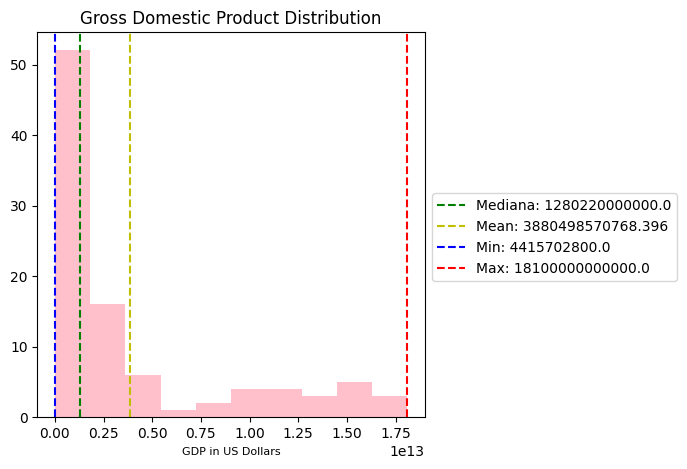

In [15]:
plt.figure(figsize=(5, 5))
plt.hist(x=gdp_data['GDP'], color='pink')
plt.axvline(x= gdp_data['GDP'].median(), color='g', label='Mediana: ' + str(gdp_data['GDP'].median()), linestyle='--')
plt.axvline(x= gdp_data['GDP'].mean(), color='y', label='Mean: ' + str(gdp_data['GDP'].mean()), linestyle='--')
plt.axvline(x= gdp_data['GDP'].min(), color='b', label='Min: ' + str(gdp_data['GDP'].min()), linestyle='--')
plt.axvline(x= gdp_data['GDP'].max(), color='r', label='Max: ' + str(gdp_data['GDP'].max()), linestyle='--')
plt.xlabel('GDP in US Dollars', size=8)
plt.title('Gross Domestic Product Distribution', loc='center', size=12)
plt.legend(bbox_to_anchor=(1.0, 0.6), loc='upper left')
plt.show()

The chart displays a clustering of outliers on its left side, indicating a right-skewed distribution.

### Two variables

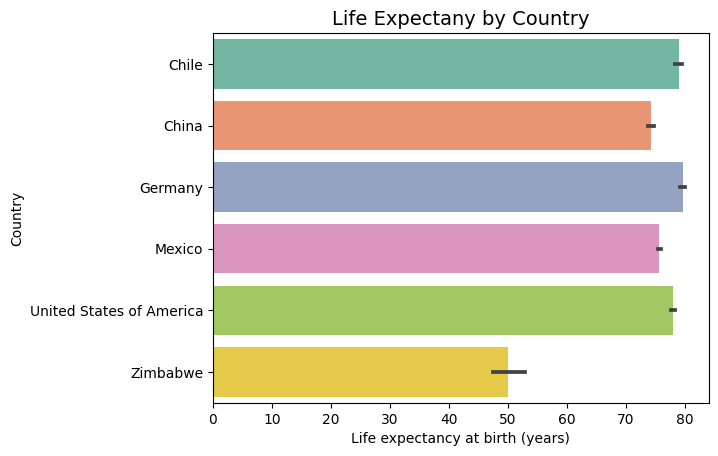

In [16]:
sns.barplot(gdp_data, x='Life expectancy at birth (years)', y='Country', palette='Set2')
plt.title('Life Expectany by Country', loc='center', size=14)
plt.show()

During the period between 2000 and 2014, the average life expectancy for most countries falls within the range of 70 to 81 years. However, Zimbabwe deviates from this trend with an average life expectancy between 45 and 61 years.

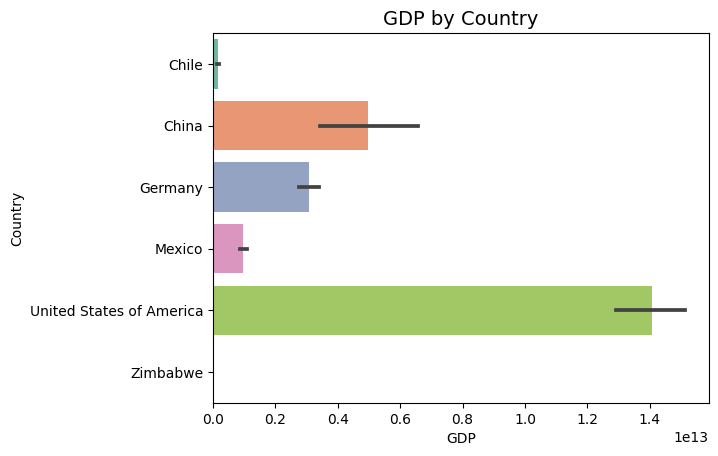

In [17]:
sns.barplot(gdp_data, x='GDP', y='Country', palette='Set2')
plt.title('GDP by Country', loc='center', size=14)
plt.show()

Here, we can observe a significant disparity in GDP among different countries.

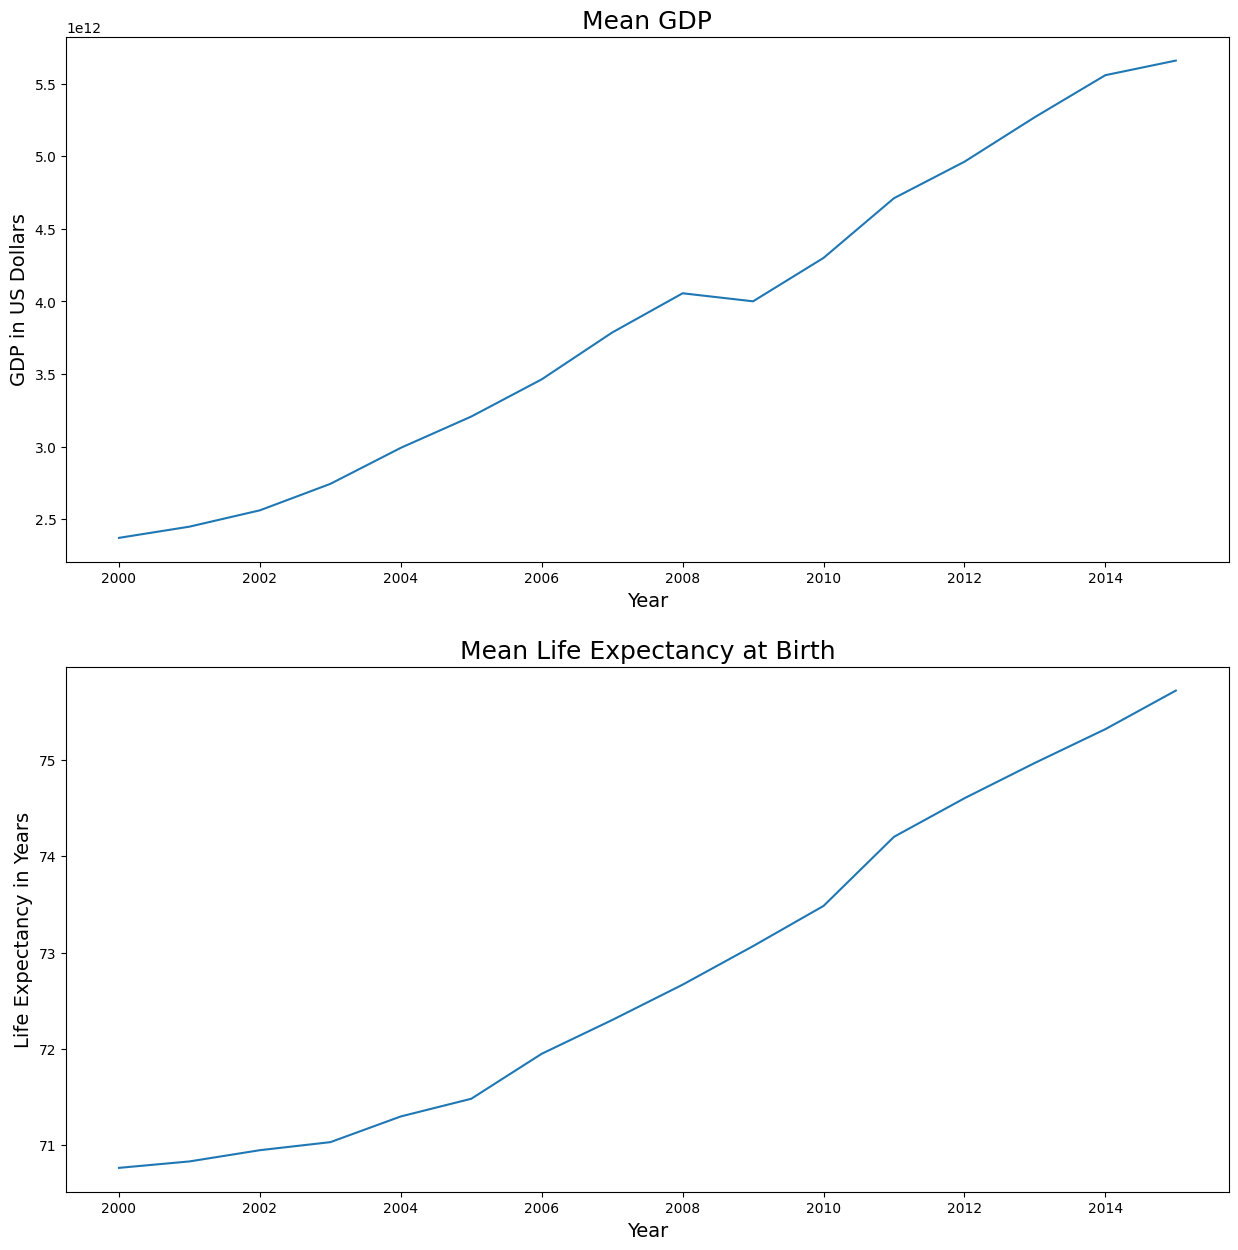

In [18]:
plt.figure (figsize=(15,15))

plt.subplot(2,1,1)
plt.plot('Year', 'GDP', data=groupby_year)
plt.xlabel('Year', size=14)
plt.ylabel('GDP in US Dollars', size=14)
plt.title('Mean GDP', loc='center', size=18)

plt.subplot(2,1,2)
plt.plot('Year', 'Life expectancy at birth (years)', data=groupby_year)
plt.xlabel('Year', size=14)
plt.ylabel('Life Expectancy in Years', size=14)
plt.title('Mean Life Expectancy at Birth', loc='center', size=18)

plt.show()

The graph illustrates a clear pattern of both GDP and life expectancy increasing over time. As we move from left to right on the chart, we can see that the values for GDP and life expectancy rise consistently and steadily with each passing year. This trend suggests a positive economic and social outlook for the countries.

### Three variables (Multivariate analysis)

#### GDP analysis

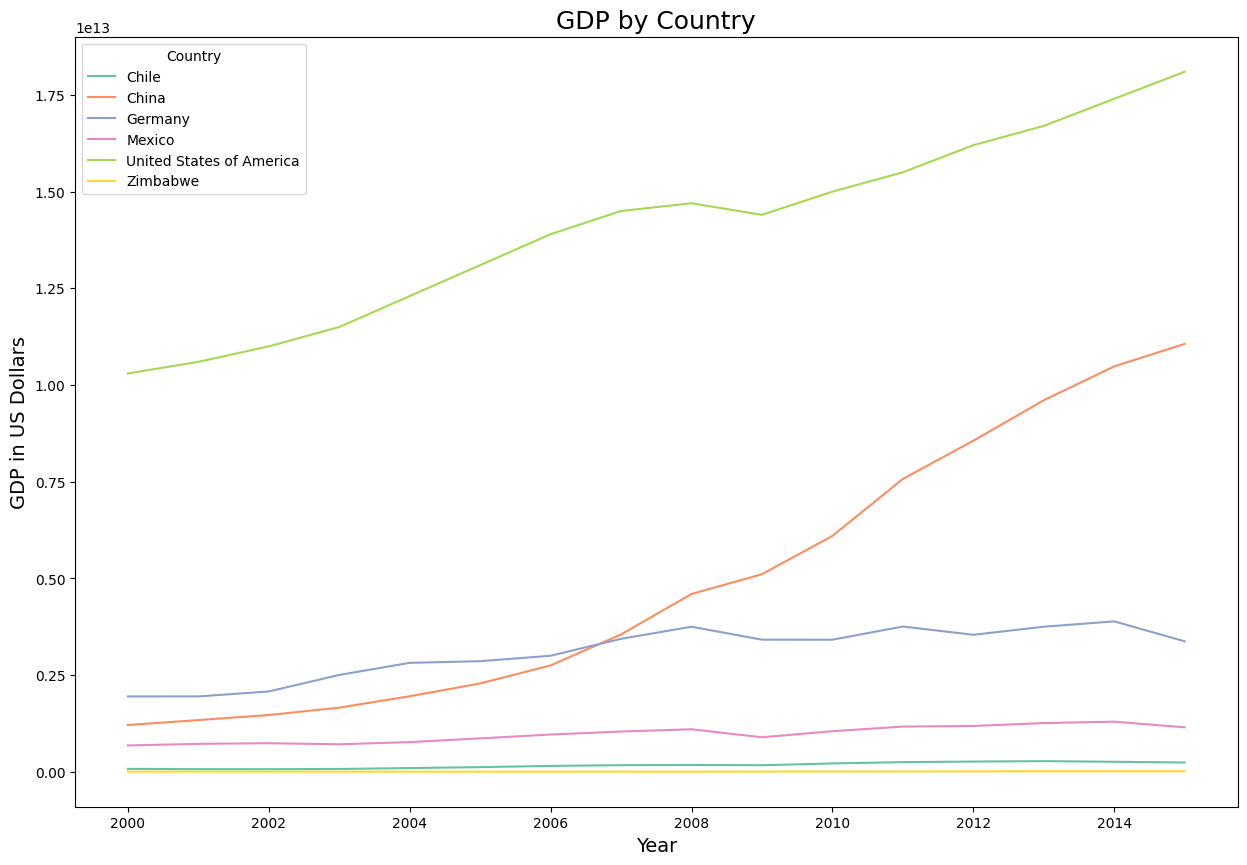

In [19]:
plt.figure(figsize=(15,10))
sns.lineplot(x=gdp_data['Year'],y=gdp_data['GDP'], hue=gdp_data['Country'], palette='Set2')
plt.xlabel('Year', size=14)
plt.ylabel('GDP in US Dollars', size=14)
plt.title('GDP by Country', loc='center', size=18)
plt.show()

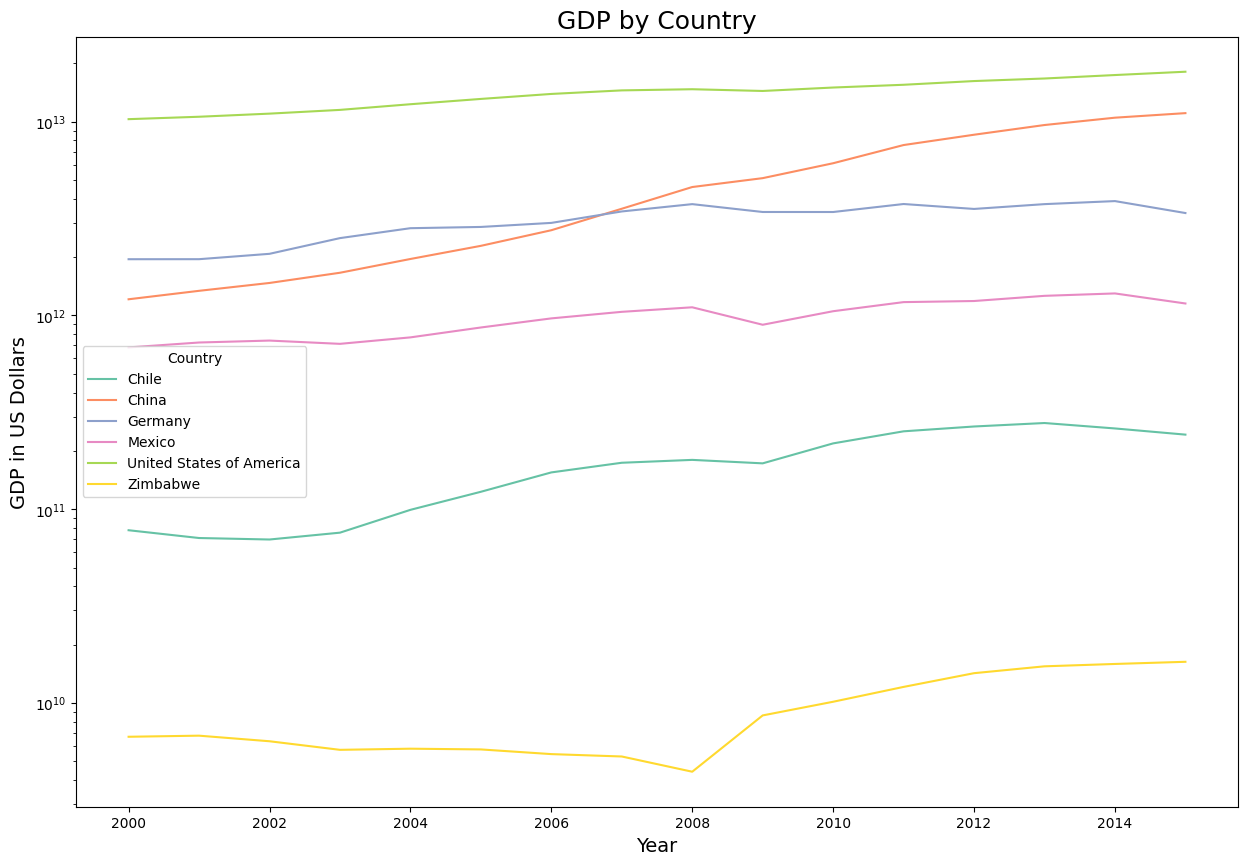

In [20]:
plt.figure(figsize=(15,10))
ax = plt.subplot()
sns.lineplot(x=gdp_data['Year'],y=gdp_data['GDP'], hue=gdp_data['Country'], palette='Set2')
ax.set_yscale('log')
plt.xlabel('Year', size=14)
plt.ylabel('GDP in US Dollars', size=14)
plt.title('GDP by Country', loc='center', size=18)
plt.show()

We can observe a clear trend of increasing GDP over time in each country. This upward trajectory indicates a positive pattern of economic growth and development that has continued to shape and improve each nation's economy.

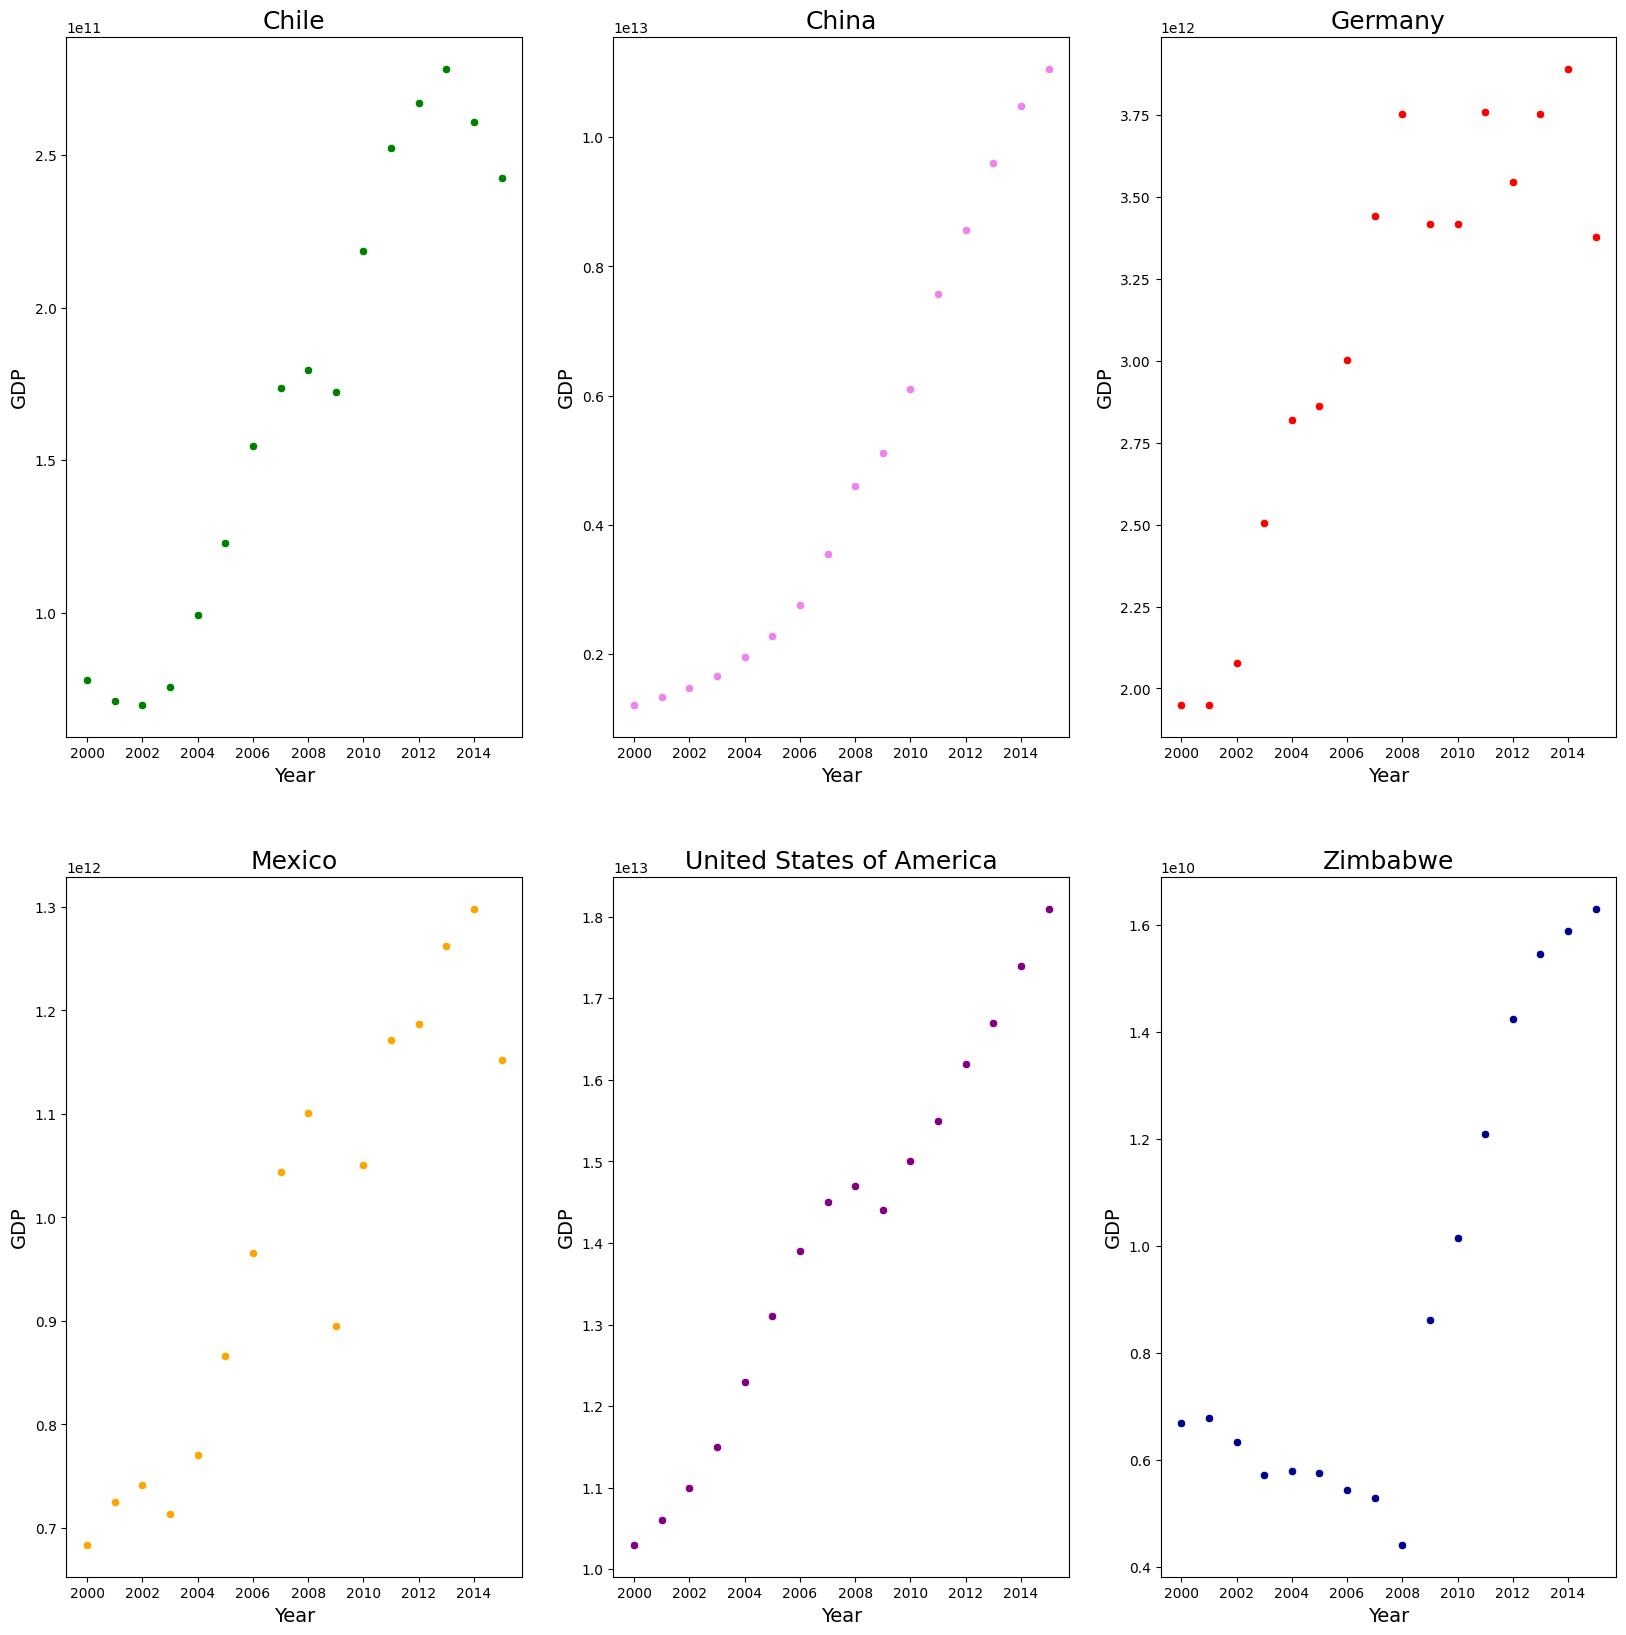

In [31]:
plt.figure(figsize=(20,20))
ax = plt.subplot(2,3,1)
sns.scatterplot(data=gdp_data[gdp_data['Country']=='Chile'], x='Year', y='GDP', color='green')
plt.xlabel('Year', size=14)
plt.ylabel('GDP', size=14)
plt.title('Chile', size=18)
ax = plt.subplot(2,3,2)
sns.scatterplot(data=gdp_data[gdp_data['Country']=='China'], x='Year', y='GDP', color='violet')
plt.xlabel('Year', size=14)
plt.ylabel('GDP', size=14)
plt.title('China', size=18)
ax = plt.subplot(2,3,3)
sns.scatterplot(data=gdp_data[gdp_data['Country']=='Germany'], x='Year', y='GDP', color='red')
plt.xlabel('Year', size=14)
plt.ylabel('GDP', size=14)
plt.title('Germany', size=18)
ax = plt.subplot(2,3,4)
sns.scatterplot(data=gdp_data[gdp_data['Country']=='Mexico'], x='Year', y='GDP', color='orange')
plt.xlabel('Year', size=14)
plt.ylabel('GDP', size=14)
plt.title('Mexico', size=18)
ax = plt.subplot(2,3,5)
sns.scatterplot(data=gdp_data[gdp_data['Country']=='United States of America'], x='Year', y='GDP', color='purple')
plt.xlabel('Year', size=14)
plt.ylabel('GDP', size=14)
plt.title('United States of America', size=18)
ax = plt.subplot(2,3,6)
sns.scatterplot(data=gdp_data[gdp_data['Country']=='Zimbabwe'], x='Year', y='GDP', color='darkblue')
plt.xlabel('Year', size=14)
plt.ylabel('GDP', size=14)
plt.title('Zimbabwe', size=18)
plt.show()

This discrepancy highlights the vast differences in economic development and growth between nations, as well as the challenges faced by developing countries in achieving sustained economic progress.

The United States and China exhibit some of the most stable and linear GDP trends globally. These two nations demonstrate a consistent pattern of economic growth and development, reflecting their status as two of the world's largest and most influential economies.

Upon closer examination, it becomes apparent that the majority of countries experienced an increase in GDP after 2004, with the exception of Zimbabwe, which had a growth period around 2008.

#### Life expectancy analysis

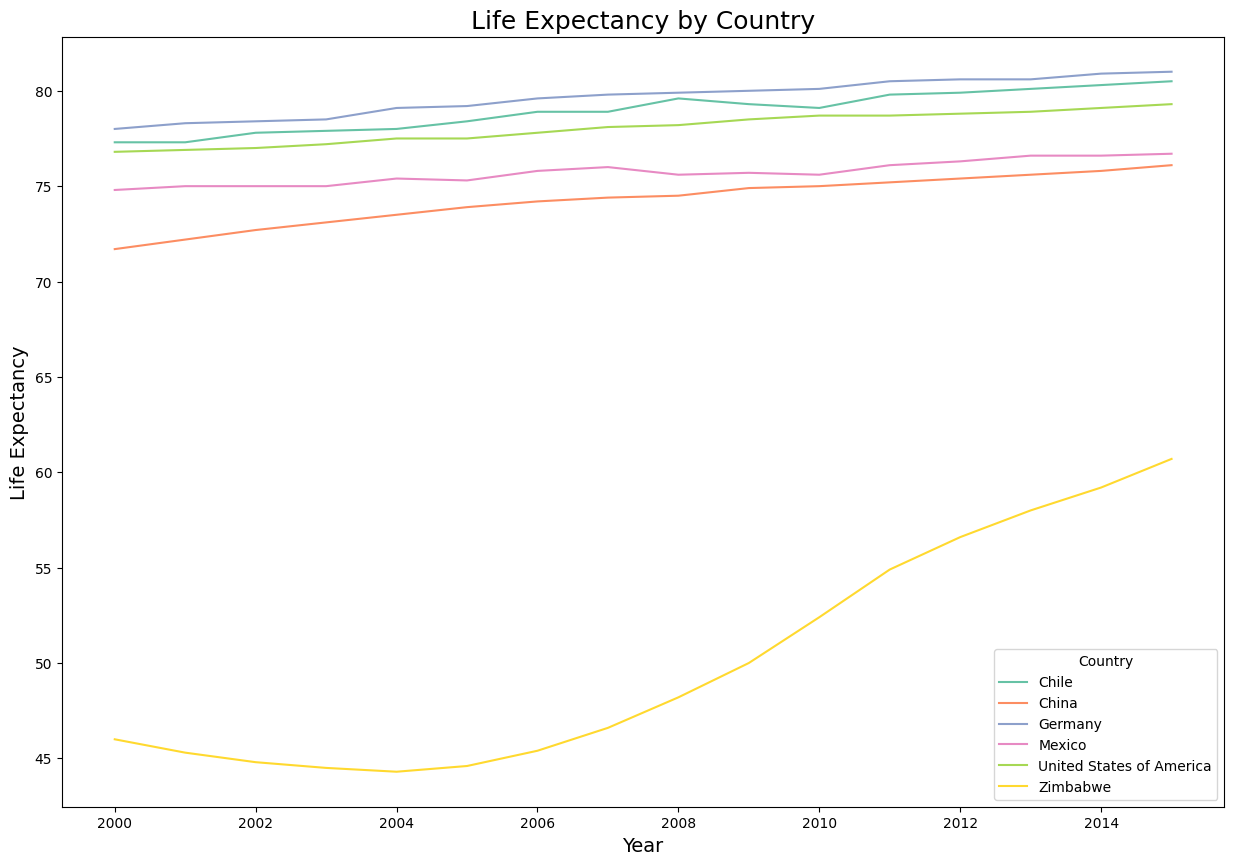

In [22]:
plt.figure (figsize=(15,10))
sns.lineplot(x=gdp_data['Year'],y=gdp_data['Life expectancy at birth (years)'], hue=gdp_data['Country'], palette='Set2')
plt.xlabel('Year', size=14)
plt.ylabel('Life Expectancy', size=14)
plt.title('Life Expectancy by Country', loc='center', size=18)
plt.show()

The graph makes it abundantly clear just how low Zimbabwe's life expectancy is compared to other countries. While other nations surpass a life expectancy threshold of 70 years, Zimbabwe lags behind significantly. Notably, the lines for Germany, Chile, and the United States are quite close together, while those for Mexico and China are slightly lower. This observation highlights the variations in healthcare and public health policies across nations and the impact they can have on life expectancy.

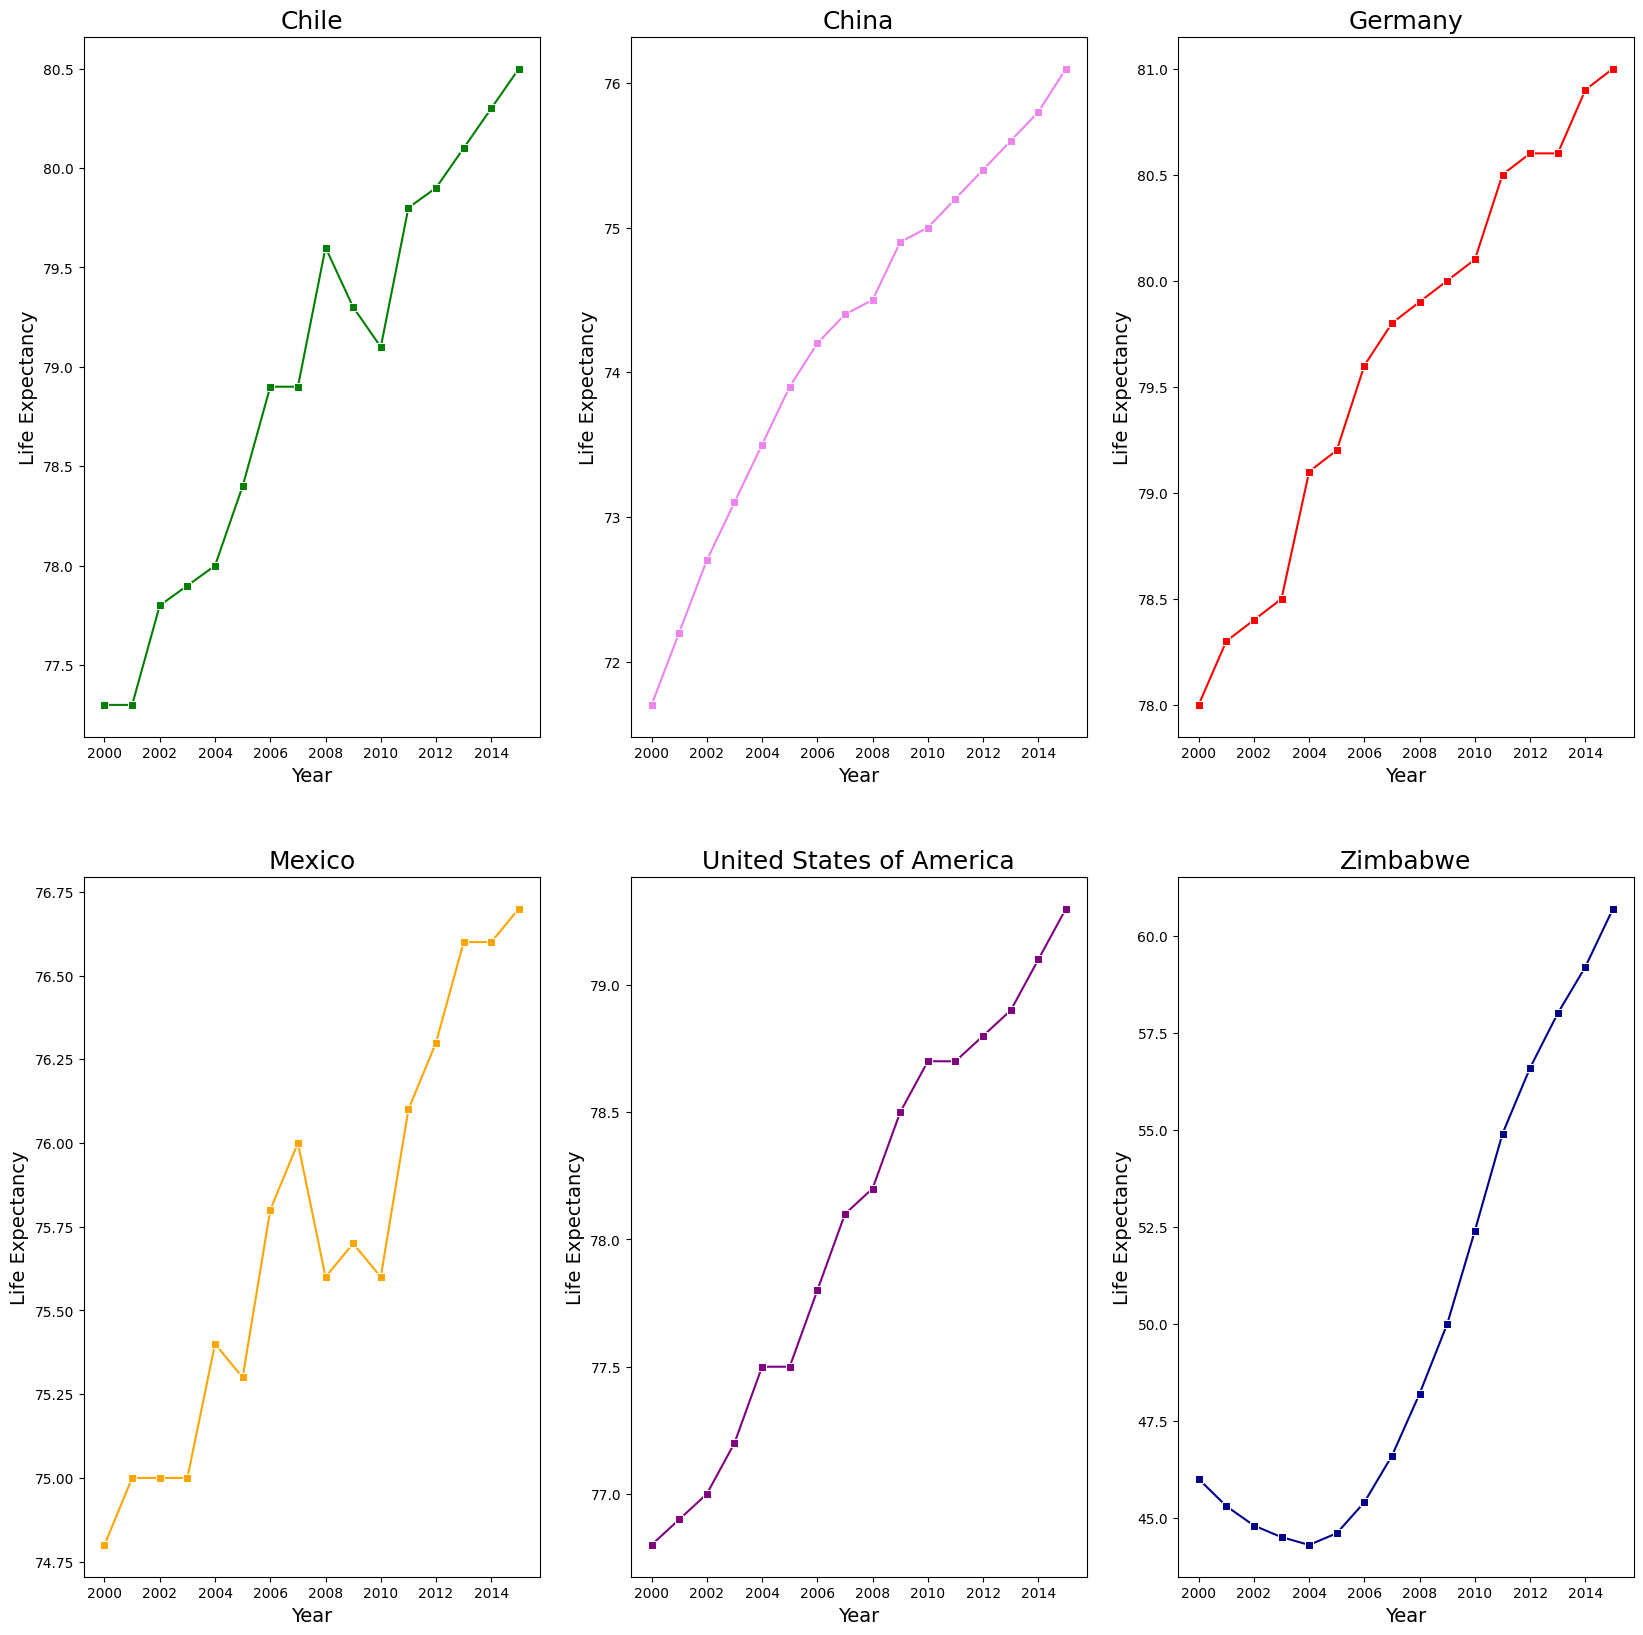

In [23]:
plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
sns.lineplot(data=gdp_data[gdp_data['Country']=='Chile'], x='Year', y='Life expectancy at birth (years)', color='green', marker='s')
plt.xlabel('Year', size=14)
plt.ylabel('Life Expectancy', size=14)
plt.title('Chile', size=18)
plt.subplot(2,3,2)
sns.lineplot(data=gdp_data[gdp_data['Country']=='China'], x='Year', y='Life expectancy at birth (years)', color='violet', marker='s')
plt.xlabel('Year', size=14)
plt.ylabel('Life Expectancy', size=14)
plt.title('China', size=18)
plt.subplot(2,3,3)
sns.lineplot(data=gdp_data[gdp_data['Country']=='Germany'], x='Year', y='Life expectancy at birth (years)', color='red', marker='s')
plt.xlabel('Year', size=14)
plt.ylabel('Life Expectancy', size=14)
plt.title('Germany', size=18)
plt.subplot(2,3,4)
sns.lineplot(data=gdp_data[gdp_data['Country']=='Mexico'], x='Year', y='Life expectancy at birth (years)', color='orange', marker='s')
plt.xlabel('Year', size=14)
plt.ylabel('Life Expectancy', size=14)
plt.title('Mexico', size=18)
plt.subplot(2,3,5)
sns.lineplot(data=gdp_data[gdp_data['Country']=='United States of America'], x='Year', y='Life expectancy at birth (years)', color='purple', marker='s')
plt.xlabel('Year', size=14)
plt.ylabel('Life Expectancy', size=14)
plt.title('United States of America', size=18)
plt.subplot(2,3,6)
sns.lineplot(data=gdp_data[gdp_data['Country']=='Zimbabwe'], x='Year', y='Life expectancy at birth (years)', color='darkblue', marker='s')
plt.xlabel('Year', size=14)
plt.ylabel('Life Expectancy', size=14)
plt.title('Zimbabwe', size=18)
plt.show()

#### Correlation

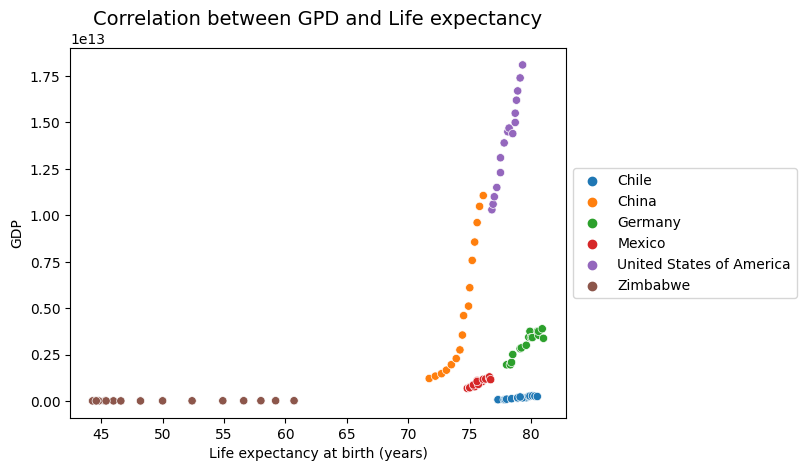

In [24]:
sns.scatterplot(x=gdp_data['Life expectancy at birth (years)'], y=gdp_data['GDP'], hue=gdp_data.Country)
plt.title('Correlation between GPD and Life expectancy', loc='center', size=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);
plt.show()

In [25]:
correlation, p = stats.pearsonr(gdp_data['Life expectancy at birth (years)'], gdp_data['GDP'])
print(correlation)

0.343206748449156


This number indicates a moderate correlation between two variables.

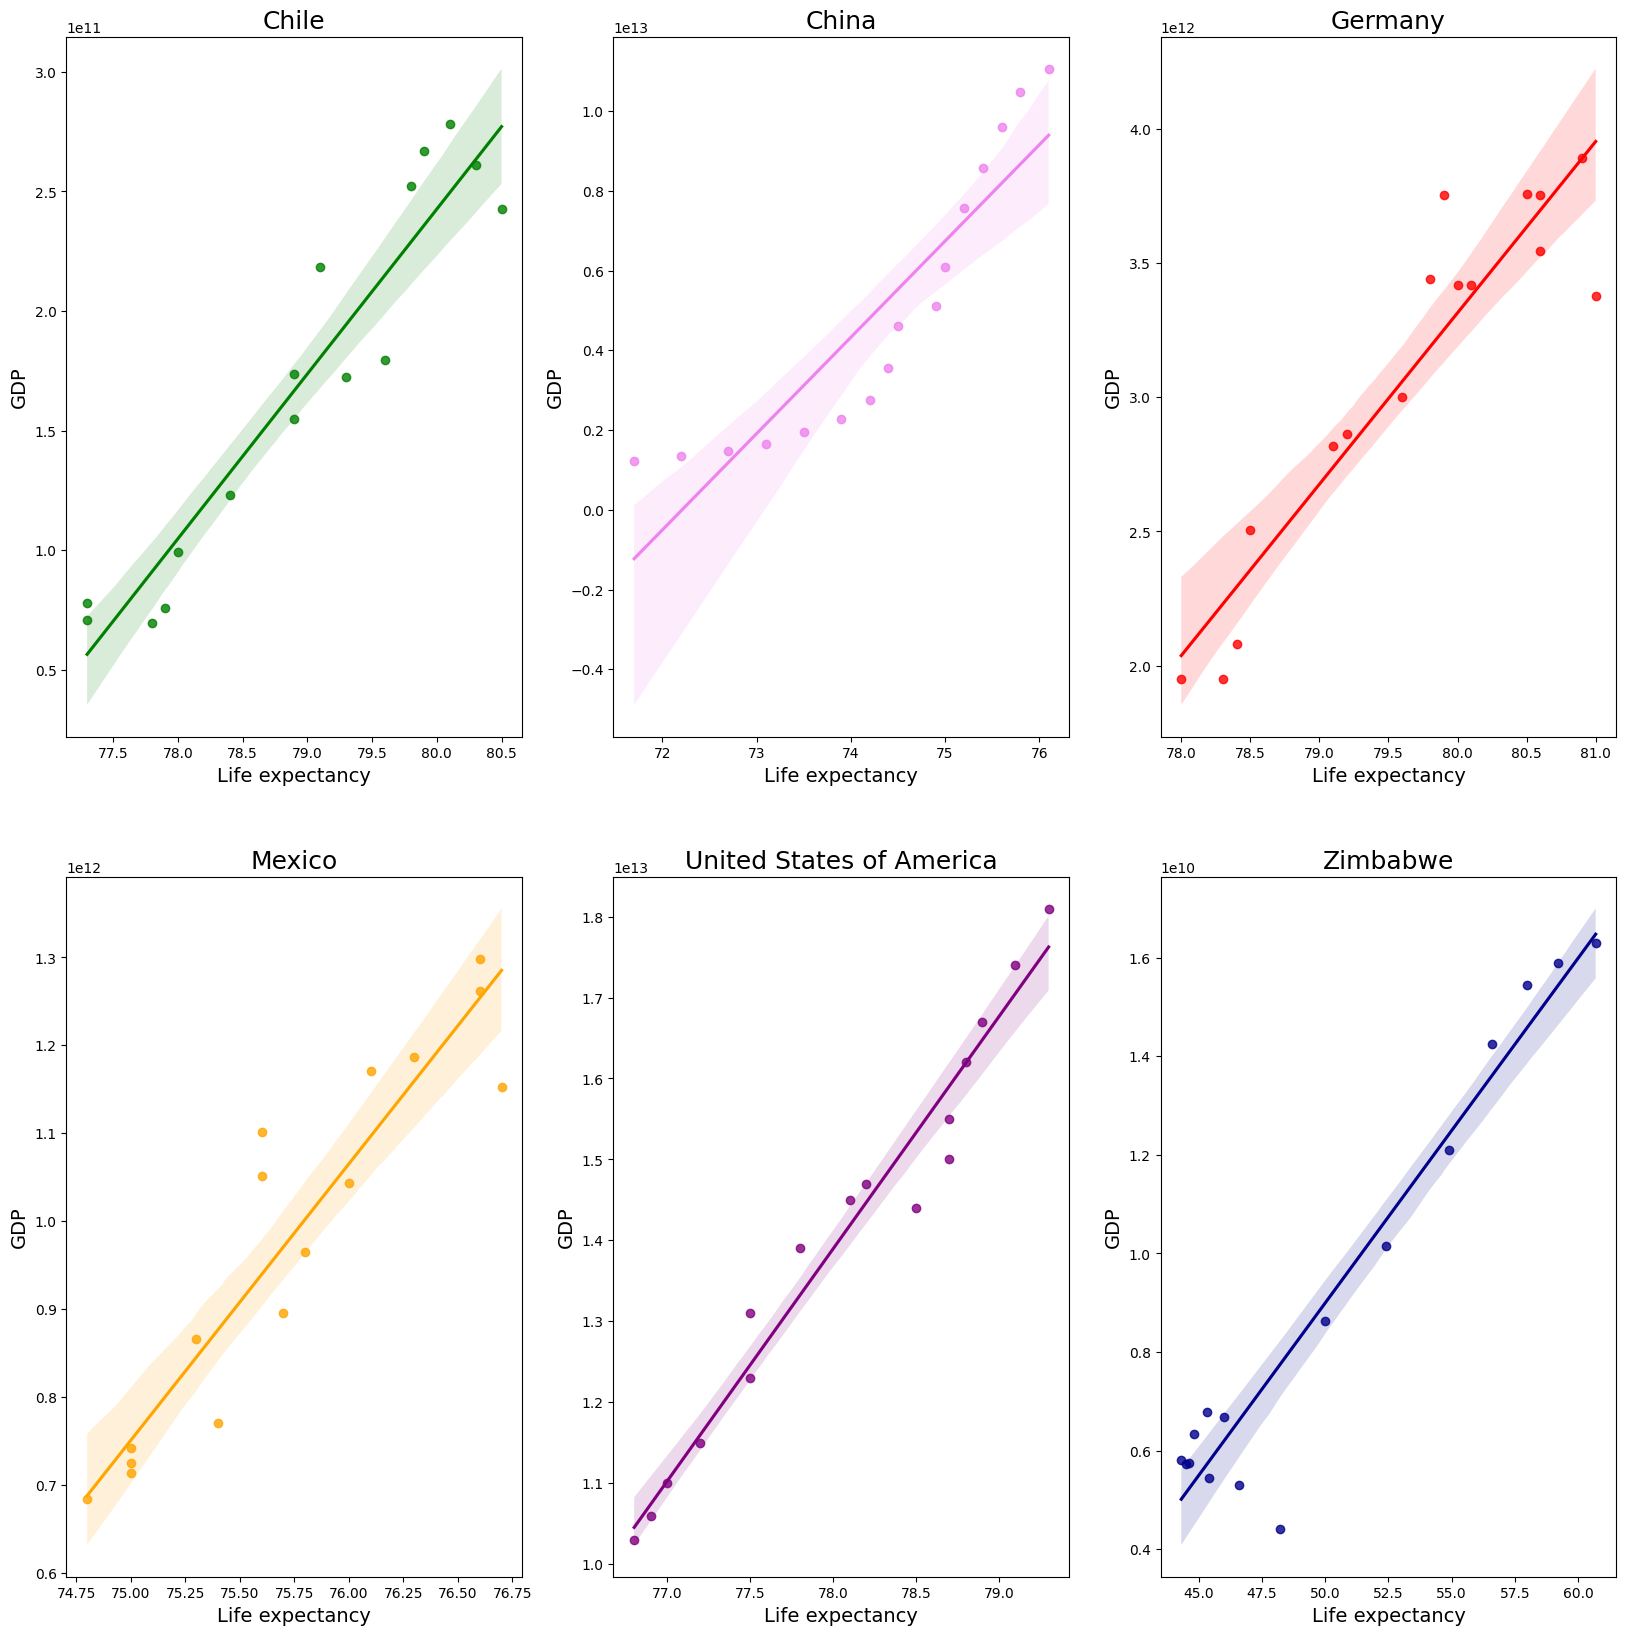

In [26]:
plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
sns.regplot(data=gdp_data[gdp_data['Country']=='Chile'], x='Life expectancy at birth (years)', y='GDP', color='green')
plt.xlabel('Life expectancy', size=14)
plt.ylabel('GDP', size=14)
plt.title('Chile', size=18)
plt.subplot(2,3,2)
sns.regplot(data=gdp_data[gdp_data['Country']=='China'], x='Life expectancy at birth (years)', y='GDP', color='violet')
plt.xlabel('Life expectancy', size=14)
plt.ylabel('GDP', size=14)
plt.title('China', size=18)
plt.subplot(2,3,3)
sns.regplot(data=gdp_data[gdp_data['Country']=='Germany'], x='Life expectancy at birth (years)', y='GDP', color='red')
plt.xlabel('Life expectancy', size=14)
plt.ylabel('GDP', size=14)
plt.title('Germany', size=18)
plt.subplot(2,3,4)
sns.regplot(data=gdp_data[gdp_data['Country']=='Mexico'], x='Life expectancy at birth (years)', y='GDP', color='orange')
plt.xlabel('Life expectancy', size=14)
plt.ylabel('GDP', size=14)
plt.title('Mexico', size=18)
plt.subplot(2,3,5)
sns.regplot(data=gdp_data[gdp_data['Country']=='United States of America'], x='Life expectancy at birth (years)', y='GDP', color='purple')
plt.xlabel('Life expectancy', size=14)
plt.ylabel('GDP', size=14)
plt.title('United States of America', size=18)
plt.subplot(2,3,6)
sns.regplot(data=gdp_data[gdp_data['Country']=='Zimbabwe'], x='Life expectancy at birth (years)', y='GDP', color='darkblue')
plt.xlabel('Life expectancy', size=14)
plt.ylabel('GDP', size=14)
plt.title('Zimbabwe', size=18)
plt.show()

In [27]:
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

for country in countries:
    data = gdp_data[gdp_data['Country']==country]
    correlation, p = stats.pearsonr(data['Life expectancy at birth (years)'], data['GDP'])
    print('In ' + country + ', the correlation between life expectancy and GDP is  ' + str(correlation))


In Chile, the correlation between life expectancy and GDP is  0.9498766659254416
In China, the correlation between life expectancy and GDP is  0.9085255408648356
In Germany, the correlation between life expectancy and GDP is  0.9326988982561268
In Mexico, the correlation between life expectancy and GDP is  0.9322377167847082
In United States of America, the correlation between life expectancy and GDP is  0.9817092382430257
In Zimbabwe, the correlation between life expectancy and GDP is  0.9661998955858778


The numbers indicate a strong correlation between GDP and life expectancy, which means that countries with higher GDP tend to have longer life expectancies. This relationship is clearly visible on the graphs, where we can see that as GDP increases, so does life expectancy.

Despite Germany's significantly higher GDP, life expectancy in Germany and Chile is roughly comparable. This suggests that factors beyond economic growth and development play a critical role in public health outcomes, including access to quality healthcare, social policies, and cultural attitudes towards health and well-being. This observation underscores the importance of taking a holistic and multi-dimensional approach to understanding global health trends.

## Additional research

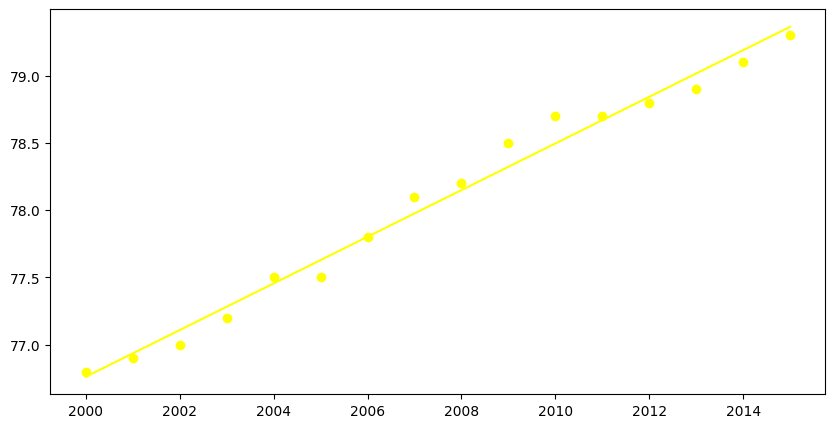

In [28]:
gdp_data_usa = gdp_data[gdp_data["Country"] == "United States of America"]
gdp_data_usa = gdp_data_usa.rename({"Life expectancy at birth (years)": "life_expectancy", "GDP": "gdp"}, axis='columns')


model = sm.OLS.from_formula('life_expectancy ~ Year', gdp_data_usa)
results = model.fit()
# Intercept interpretation:
intercept = results.params[0]
# Slope interpretation:
slope = results.params[1]
# Plot the scatter plot with the line on top
plt.figure(figsize=(10,5))
plt.scatter(gdp_data_usa.Year, gdp_data_usa.life_expectancy, color='yellow')
plt.plot(gdp_data_usa.Year, results.predict(gdp_data_usa), color='yellow')
plt.show()

In [29]:
year_2050 = slope * 2050 + intercept
print(year_2050)

85.4375000000008


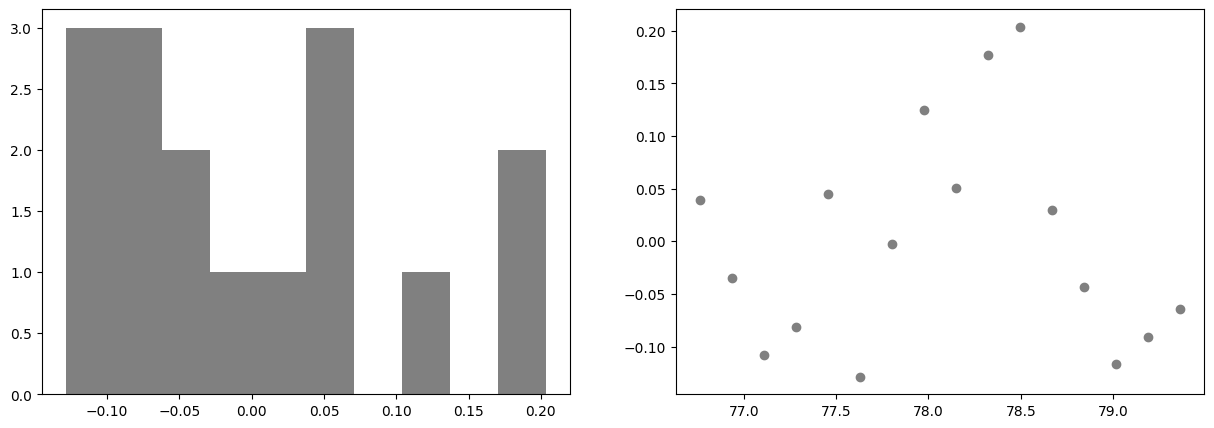

In [30]:
# Calculate fitted values
fitted = results.predict(gdp_data_usa)
# Calculate residuals
residuals = gdp_data_usa.life_expectancy - fitted

# Check normality assumption
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(residuals, color='grey')

# Check homoscedasticity assumption
plt.subplot(1,2,2)
plt.scatter(fitted, residuals, color='grey')
plt.show()

It is projected that the average life expectancy in 2050 in USA will be 85 years. This estimate takes into account various factors such as advances in medicine, improvements in healthcare infrastructure, and lifestyle changes that promote longevity.

Assuming that this projection holds true, it will have significant implications for many aspects of society. For example, it may lead to changes in retirement age policies, as people may be able to work and contribute to society for longer periods. It may also affect healthcare policies and resources, as there may be a higher demand for geriatric care and specialized medical services.

However, it is important to note that projections about future life expectancy are subject to uncertainty and can be influenced by many factors. Therefore, it is essential to continue monitoring trends in life expectancy and adjust policies accordingly to ensure the well-being of individuals and society as a whole.

**Thank for your attention :)**